   ### Udacity Data Analyst Nanodegree
# Identify Fraud from Enron Email
   ###### By Areej Alashjaee

___________________________________________________________

# Overview

The purpose of this project to detect person of interest (poi) in Enron scandal from a given dataset,downloaded from this github https://github.com/udacity/ud120-projects.

This project will folow these steps below:

- Data Exploration
- Clean the dataset based on some observations. 
- Add new features into the dataset.
- Features select
- Pick an algorithm
- Tune an algorithm

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, there was a significant amount of typically confidential information entered into public record, including tens of thousands of emails and detailed financial data for top executives.

# Data Exploration 

In [4]:
import pickle
import sys
import sys
import pickle
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import numpy as np
import pickle
from pprint import pprint


import os
os.chdir('/Users/lama/udacity_p05_enron/final_project')
sys.path.append("/Users/lama/udacity_P05_enron/tools/")

Populating the interactive namespace from numpy and matplotlib


In [5]:
data_dict = pickle.load(open('/Users/lama/udacity_P05_enron/final_project/final_project_dataset.pkl', "r"))
df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=np.float)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       95 non-null float64
to_messages                  86 non-null float64
deferral_payments            39 non-null float64
total_payments               125 non-null float64
exercised_stock_options      102 non-null float64
bonus                        82 non-null float64
restricted_stock             110 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    18 non-null float64
total_stock_value            126 non-null float64
expenses                     95 non-null float64
loan_advances                4 non-null float64
from_messages                86 non-null float64
other                        93 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          146 non-null float64
director_fees                17 non-null float64
deferred_income              49 non-null fl

In [7]:
df = pd.DataFrame.from_dict(data_dict, orient='index', dtype=np.float)
df.head(20)


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,...,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,1729541.0,4175000.0,126027.0,1407.0,-126027.0,1729541.0,...,NaN,2195.0,152.0,65.0,0.0,NaN,-3081055.0,304805.0,phillip.allen@enron.com,47.0
BADUM JAMES P,NaN,NaN,178980.0,182466.0,257817.0,NaN,NaN,NaN,NaN,257817.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,4046157.0,NaN,1757552.0,465.0,-560222.0,5243487.0,...,NaN,29.0,864523.0,0.0,0.0,NaN,-5104.0,NaN,james.bannantine@enron.com,39.0
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,6680544.0,1200000.0,3942714.0,NaN,NaN,10623258.0,...,NaN,NaN,2660303.0,NaN,0.0,NaN,-1386055.0,1586055.0,NaN,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,145796.0,NaN,-82782.0,63014.0,...,NaN,NaN,69.0,NaN,0.0,NaN,-201641.0,NaN,frank.bay@enron.com,NaN
BAZELIDES PHILIP J,80818.0,NaN,684694.0,860136.0,1599641.0,NaN,NaN,NaN,NaN,1599641.0,...,NaN,NaN,874.0,NaN,0.0,NaN,NaN,93750.0,NaN,NaN
BECK SALLY W,231330.0,7315.0,NaN,969068.0,NaN,700000.0,126027.0,2639.0,NaN,126027.0,...,NaN,4343.0,566.0,386.0,0.0,NaN,NaN,NaN,sally.beck@enron.com,144.0
BELDEN TIMOTHY N,213999.0,7991.0,2144013.0,5501630.0,953136.0,5249999.0,157569.0,5521.0,NaN,1110705.0,...,NaN,484.0,210698.0,108.0,1.0,NaN,-2334434.0,NaN,tim.belden@enron.com,228.0
BELFER ROBERT,NaN,NaN,-102500.0,102500.0,3285.0,NaN,NaN,NaN,44093.0,-44093.0,...,NaN,NaN,NaN,NaN,0.0,3285.0,NaN,NaN,NaN,NaN
BERBERIAN DAVID,216582.0,NaN,NaN,228474.0,1624396.0,NaN,869220.0,NaN,NaN,2493616.0,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,david.berberian@enron.com,NaN


In [8]:
#print POI and total number
print('\nNumber of persons: ' + str(len(data_dict)))
print "Number of feature for each person:",len(data_dict.itervalues().next())






Number of persons: 146
Number of feature for each person: 21


In [9]:
x=0
for i in data_dict:
        if data_dict[i]["poi"]==1:
            x+=1
            
print "number of POI's in the dataset:",x

number of POI's in the dataset: 18


POIs = peopelse who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.
Of the 146 people in the dataset, 18 were labeled as POI, persons of interest.



In [10]:
names=data_dict.keys()
print names

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

In [11]:
df.describe()


,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,from_poi_to_this_person
count,9.500000e+01,86.000000,3.900000e+01,1.250000e+02,1.020000e+02,8.200000e+01,1.100000e+02,86.000000,1.800000e+01,1.260000e+02,9.500000e+01,4.000000e+00,86.000000,9.300000e+01,86.000000,146.000000,1.700000e+01,4.900000e+01,6.600000e+01,86.000000
mean,5.621943e+05,2073.860465,1.642674e+06,5.081526e+06,5.987054e+06,2.374235e+06,2.321741e+06,1176.465116,1.664106e+05,6.773957e+06,1.087289e+05,4.196250e+07,608.790698,9.190650e+05,41.232558,0.123288,1.668049e+05,-1.140475e+06,1.470361e+06,64.895349
std,2.716369e+06,2582.700981,5.161930e+06,2.906172e+07,3.106201e+07,1.071333e+07,1.251828e+07,1178.317641,4.201494e+06,3.895777e+07,5.335348e+05,4.708321e+07,1841.033949,4.589253e+06,100.073111,0.329899,3.198914e+05,4.025406e+06,5.942759e+06,86.979244
min,4.770000e+02,57.000000,-1.025000e+05,1.480000e+02,3.285000e+03,7.000000e+04,-2.604490e+06,2.000000,-7.576788e+06,-4.409300e+04,1.480000e+02,4.000000e+05,12.000000,2.000000e+00,0.000000,0.000000,3.285000e+03,-2.799289e+07,6.922300e+04,0.000000
25%,2.118160e+05,541.250000,8.157300e+04,3.944750e+05,5.278862e+05,4.312500e+05,2.540180e+05,249.750000,-3.896218e+05,4.945102e+05,2.261400e+04,1.600000e+06,22.750000,1.215000e+03,1.000000,0.000000,9.878400e+04,-6.948620e+05,2.812500e+05,10.000000
50%,2.599960e+05,1211.000000,2.274490e+05,1.101393e+06,1.310814e+06,7.693750e+05,4.517400e+05,740.500000,-1.469750e+05,1.102872e+06,4.695000e+04,4.176250e+07,41.000000,5.238200e+04,8.000000,0.000000,1.085790e+05,-1.597920e+05,4.420350e+05,35.000000
75%,3.121170e+05,2634.750000,1.002672e+06,2.093263e+06,2.547724e+06,1.200000e+06,1.002370e+06,1888.250000,-7.500975e+04,2.949847e+06,7.995250e+04,8.212500e+07,145.500000,3.620960e+05,24.750000,0.000000,1.137840e+05,-3.834600e+04,9.386720e+05,72.250000
max,2.670423e+07,15149.000000,3.208340e+07,3.098866e+08,3.117640e+08,9.734362e+07,1.303223e+08,5521.000000,1.545629e+07,4.345095e+08,5.235198e+06,8.392500e+07,14368.000000,4.266759e+07,609.000000,1.000000,1.398517e+06,-8.330000e+02,4.852193e+07,528.000000


###### Statistics of dependent variable poi

The mean value indicates that only 12.4% of poi is True.
In the above result, count is the number of total non-NaN values.
The count of poi equals to the total rows, showing that every row has a poi value.


In [12]:
print df.iloc[0]

salary                                        201955
to_messages                                     2902
deferral_payments                        2.86972e+06
total_payments                           4.48444e+06
exercised_stock_options                  1.72954e+06
bonus                                      4.175e+06
restricted_stock                              126027
shared_receipt_with_poi                         1407
restricted_stock_deferred                    -126027
total_stock_value                        1.72954e+06
expenses                                       13868
loan_advances                                    NaN
from_messages                                   2195
other                                            152
from_this_person_to_poi                           65
poi                                                0
director_fees                                    NaN
deferred_income                         -3.08106e+06
long_term_incentive                           

#  Feature selection



Create  The_list to include all the feature names from the dataset, the first feature must be "poi" .


In [13]:
The_list = ['poi']  + [feature for feature in df if feature != 'poi' and feature != 'email_address']
## Select only the features from the list
df = df[The_list]
print "The Features: "
print The_list

The Features: 
['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']


This function to remove the "email_address" feature, because it's a text and its information is correlated to the Name of the person.

In [14]:
#Create a pandas data frame and removing email variable
df = pd.DataFrame(data_dict).transpose()
pprint(df.columns.tolist())
del df['email_address']
df = df.replace('%','',regex=True).astype('float')

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']


In [15]:
# Change the NaN to numpy nan instead and rerun the code
df.replace(to_replace='NaN', value=np.nan, inplace=True)
df.isnull().sum()

bonus                         64
deferral_payments            107
deferred_income               97
director_fees                129
exercised_stock_options       44
expenses                      51
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
loan_advances                142
long_term_incentive           80
other                         53
poi                            0
restricted_stock              36
restricted_stock_deferred    128
salary                        51
shared_receipt_with_poi       60
to_messages                   60
total_payments                21
total_stock_value             20
dtype: int64

In [16]:
drop_list=df.isnull().sum().index.values[ np.array(df.isnull().sum() > 80) ]
print drop_list


['deferral_payments' 'deferred_income' 'director_fees' 'loan_advances'
 'restricted_stock_deferred']


In [17]:

df.describe()
## The amil address won't be useful for the analysis

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,146.000000,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,0.123288,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,0.329899,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,0.000000,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,0.000000,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,0.000000,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,0.000000,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.000000,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


                                 no poi           poi  rel. change
bonus                      2.446776e+06  2.075000e+06    -0.179169
deferral_payments          1.807789e+06  5.198942e+05    -2.477225
deferred_income           -1.170917e+06 -1.035313e+06    -0.130978
director_fees              1.668049e+05           NaN          NaN
exercised_stock_options    5.390155e+06  1.046379e+07     0.484876
expenses                   1.201496e+05  5.987383e+04    -1.006713
from_messages              6.687639e+02  3.003571e+02    -1.226562
from_poi_to_this_person    5.850000e+01  9.778571e+01     0.401753
from_this_person_to_poi    3.627778e+01  6.671429e+01     0.456222
loan_advances              2.877500e+07  8.152500e+07     0.647041
long_term_incentive        1.529361e+06  1.204862e+06    -0.269324
other                      9.469212e+05  8.029974e+05    -0.179233
restricted_stock           2.322312e+06  2.318621e+06    -0.001592
restricted_stock_deferred  1.664106e+05           NaN         

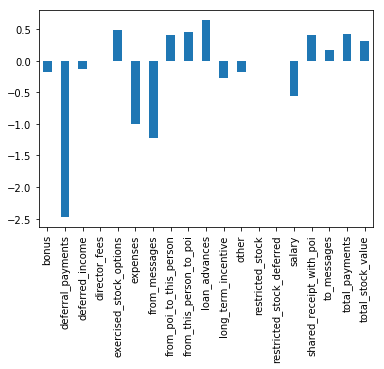

In [18]:
total_mean = df.mean().drop('poi')
poi_mean = df[df['poi'] == 1].mean().drop('poi')
nonpoi_mean = df[df['poi'] == 0].mean().drop('poi')
rel_change = ((poi_mean - nonpoi_mean) / poi_mean) 
print(pd.DataFrame({'poi' : poi_mean,
                    'no poi' : nonpoi_mean,
                    'rel. change' : rel_change
                   }))
rel_change.plot(kind = 'bar')

This plot shows that POIs on average received a lot more money from all the sources.
The only variables the non POIs have higher mean values are deferral_payments, director_fees, from_messages and restricted_stock_deffered. Thus pois may identify well with high payment values.



In [19]:
 #NaN count for variables
print('Fraction of NaNs per variable: ')
print(df.isnull().sum()/len(df.index))

Fraction of NaNs per variable: 
bonus                        0.438356
deferral_payments            0.732877
deferred_income              0.664384
director_fees                0.883562
exercised_stock_options      0.301370
expenses                     0.349315
from_messages                0.410959
from_poi_to_this_person      0.410959
from_this_person_to_poi      0.410959
loan_advances                0.972603
long_term_incentive          0.547945
other                        0.363014
poi                          0.000000
restricted_stock             0.246575
restricted_stock_deferred    0.876712
salary                       0.349315
shared_receipt_with_poi      0.410959
to_messages                  0.410959
total_payments               0.143836
total_stock_value            0.136986
dtype: float64


There are quite a lot NANs in the data set. 
Since these variable are connected to rare events,they probably won't add much information to the model.

In [20]:
names = ['SKILLING JEFFREY K', 'FASTOW ANDREW S', 'LAY KENNETH L']
names_payments = {name:data_dict[name]['total_payments'] for name in names}
print sorted(names_payments.items(), key=lambda x: x[1], reverse=True)

[('LAY KENNETH L', 103559793), ('SKILLING JEFFREY K', 8682716), ('FASTOW ANDREW S', 2424083)]


In [21]:
df.corr()

## bonus, salary to a "virtual feature" that kind of equal to "wealth", which may indicate that a POI.


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
bonus,1.000000,0.978808,-0.980138,NaN,0.990518,0.989117,0.052725,0.562187,0.354634,0.640266,0.995012,0.961757,-0.013837,0.985062,-0.975080,0.993425,0.549102,0.372997,0.963154,0.990202
deferral_payments,0.978808,1.000000,-0.994974,1.000000,0.960891,0.973234,0.321947,0.424101,0.206993,0.356130,0.971950,0.958584,-0.084502,0.970340,-0.996176,0.977846,0.356696,0.310129,0.923344,0.963424
deferred_income,-0.980138,-0.994974,1.000000,-0.995729,-0.977234,-0.970539,-0.319995,-0.178951,-0.271673,-0.433300,-0.982358,-0.945725,0.014201,-0.971404,0.973253,-0.977737,-0.394677,-0.350815,-0.925775,-0.975203
director_fees,NaN,1.000000,-0.995729,1.000000,0.996597,0.995207,1.000000,NaN,1.000000,NaN,NaN,1.000000,NaN,0.999011,-0.565314,NaN,1.000000,-1.000000,0.994356,0.997112
exercised_stock_options,0.990518,0.960891,-0.977234,0.996597,1.000000,0.983227,-0.066129,0.160253,-0.030101,0.665824,0.990516,0.967541,0.052886,0.991501,-0.475566,0.992739,0.154333,0.079568,0.965020,0.998869
expenses,0.989117,0.973234,-0.970539,0.995207,0.983227,1.000000,0.094144,-0.059244,0.014964,0.600193,0.988083,0.953230,-0.044508,0.982824,-0.976320,0.995945,0.223495,0.155070,0.946242,0.984372
from_messages,0.052725,0.321947,-0.319995,1.000000,-0.066129,0.094144,1.000000,0.186708,0.588687,-0.213768,-0.071958,-0.101686,-0.074308,0.003145,-0.326671,-0.003541,0.230855,0.475450,-0.033089,-0.036310
from_poi_to_this_person,0.562187,0.424101,-0.178951,NaN,0.160253,-0.059244,0.186708,1.000000,0.445063,0.009878,0.212538,0.111249,0.167722,0.133594,-0.455876,0.179055,0.659264,0.525667,0.154431,0.146366
from_this_person_to_poi,0.354634,0.206993,-0.271673,1.000000,-0.030101,0.014964,0.588687,0.445063,1.000000,0.934835,0.083591,-0.110335,0.112940,0.049284,-0.398550,0.021288,0.475748,0.568506,0.011556,0.001289
loan_advances,0.640266,0.356130,-0.433300,NaN,0.665824,0.600193,-0.213768,0.009878,0.934835,1.000000,0.553638,0.584598,0.560178,0.585069,NaN,0.600576,0.291501,0.739805,0.816098,0.667922


In [22]:
df.describe()
## To examine is there  any extreme data

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,146.000000,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,0.123288,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,0.329899,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,0.000000,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,0.000000,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,0.000000,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,0.000000,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.000000,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


There are two type of data here, one about money, one about email features. So, there is a need to seperate these two types in different way.

# first explore the distribution of datas.
#### exploring some bivariative relationship between some quantitative features from the Enron dataset.



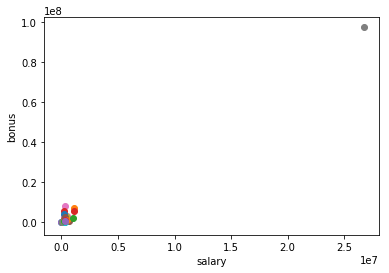

In [23]:
 #salary vs. bonus
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline
### read in data dictionary, convert to numpy array
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In the chary above there are an outlier that  extremely higher than the rest of the data. 

Let's come back to the dataset and see what was the data point.



In [24]:
# remove NaN's and find max salary 
salary_list = []
for entry in data_dict:
    if type (data_dict[entry]['salary']) == int :
        salary_list.append(data_dict[entry]['salary'])
print "Total people with salary: " + str(len(salary_list))
print "Maxium salary was " + str(max(salary_list))

Total people with salary: 95
Maxium salary was 26704229


In [25]:
# find person with max salary
for entry in data_dict:
    if data_dict[entry]['salary'] == 26704229:
        print "Name of person with maximum salary " + entry

Name of person with maximum salary TOTAL


The outlier was the TOTAL salary and bonus.
Function below to remove it from the dataset



In [26]:
# remove outlier from the data
data_dict.pop('TOTAL',0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [27]:
# mean salary
print "Average salary: " + str(int(np.mean(salary_list)))

Average salary: 562194


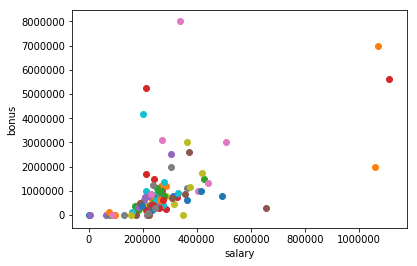

In [28]:
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data_dict.pop('TOTAL', 0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

There’s 4 more outliers to investigate.
Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars.

In [29]:
#What are the names associated with the point above? 
from pprint import pprint
outliers_salary = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers_salary.append((key,int(val)))

top_4 = sorted(outliers_salary,key=lambda x:x[1],reverse=True)[:4]

pprint(top_4)

[('SKILLING JEFFREY K', 1111258),
 ('LAY KENNETH L', 1072321),
 ('FREVERT MARK A', 1060932),
 ('PICKERING MARK R', 655037)]


In [30]:
# are they POIs?
for people in top_4:
    if data_dict[people[0]]['poi'] == 1:
        print people[0]

SKILLING JEFFREY K
LAY KENNETH L


There were two of top 4 outlier salary were POIs.


# Features processing


The data has been cleaned. The functions below added a new feature. 


In [31]:
def get_total(key1, key2):
    'merge 2 lists in one, and assign NaN = 0'
    Nlist = []
    for i in data_dict:
        # assign NaN to 0
        if data_dict[i][key1] == 'NaN' or data_dict[i][key2] == 'NaN':
            Nlist.append(0.)
        elif data_dict[i][key1]>=0:
            Nlist.append(float(data_dict[i][key1]) + float(data_dict[i][key2]))
    return Nlist

In [32]:
# get the total poi related emails:
T_poi_emails = get_total('from_this_person_to_poi', 'from_poi_to_this_person')

In [33]:
# get the total emails
total_emails = get_total('to_messages', 'from_messages')

In [34]:
def fraction_l(list1, list2):
    'devide one list by other'
    fractionl = []
    for i in range(0,len(list1)):
        if list2[i] == 0.0:
            fractionl.append(0.0)
                
        else:
            fractionl.append(float(list1[i])/float(list2[i]))
            #print fraction
    return fractionl

In [35]:
# get the fraction of poi emails
fraction_poi_emails = fraction_l(T_poi_emails, total_emails)

In [36]:
# add this new feature to the data
count = 0
for i in data_dict:
    data_dict[i]['fraction_poi_emails'] = fraction_poi_emails[count]
    count += 1

# test
print 'SKILLING fraction_poi_emails: ', data_dict['SKILLING JEFFREY K']['fraction_poi_emails']

SKILLING fraction_poi_emails:  0.031593038822


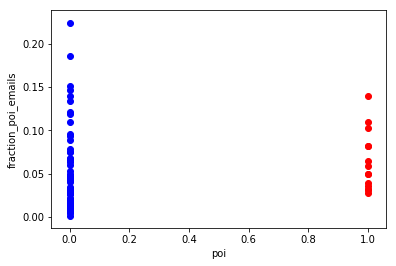

In [37]:
# let's test if this feature has any correlation with POIs
new_features_l = ['poi', 'fraction_poi_emails']
data = featureFormat(data_dict, new_features_l)

%matplotlib inline
### your code below
for point in data:
    poi = point[0]
    fraction_poi_emails = point[1]
    #matplotlib.pyplot.boxplot( data )
    if point[0] == 1:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'r')
    else:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'b')
    #matplotlib.pyplot.boxplot(data)
matplotlib.pyplot.xlabel("poi")
matplotlib.pyplot.ylabel("fraction_poi_emails")
matplotlib.pyplot.show()

There is a different of fraction of poi and non-poi emails. 



In [40]:
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


In [41]:

# load the data
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

# features_list
features_list = ['poi','salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)



In [42]:

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'
# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])




Accuracy: 0.844827586207
Precision:  0.333333333333
Recall:  0.125
Decision Tree algorithm run time:  0.457 s
Feature Ranking: 
1 feature salary (0.337437907714)
2 feature from_poi_to_this_person (0.161410018553)
3 feature from_this_person_to_poi (0.109563164109)
4 feature to_messages (0.101688311688)
5 feature deferral_payments (0.0753246753247)
6 feature total_payments (0.0753246753247)
7 feature exercised_stock_options (0.0564935064935)
8 feature bonus (0.048961038961)
9 feature restricted_stock (0.0337967018319)
10 feature shared_receipt_with_poi (0.0)



For feature ranking, it first looked like the feature ranking just rank to the order of the feature list. This may not work very well. It could be better to use SelectKbest.

##### run Select K best

In [44]:
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

# load the data
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

# featureas_list
features_list = ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=10)
selectedFeatures = selector.fit(features,labels)
feature_names = [features_list[i] for i in selectedFeatures.get_support(indices=True)]
print 'Best features: ', feature_names

Best features:  ['deferral_payments', 'exercised_stock_options', 'bonus', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'director_fees', 'deferred_income']


The code below use the features and run the again the Decision Tree to see any improvement

In [45]:

# features_list
features_list = ['poi','deferral_payments', 'exercised_stock_options', 'bonus', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'director_fees', 'deferred_income']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.862068965517
Precision:  0.5
Recall:  0.375
F1 score: 0.428571428571
Decision Tree algorithm run time:  0.01 s


##### the precision and recall was much better with value of 0.5 and 0.375 respectively.



# Tune an algorithm
##### Random Forest


In [46]:
features_list = ['poi','deferral_payments', 'exercised_stock_options', 'bonus', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'director_fees', 'deferred_income']
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
t0 = time()
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Random algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.862068965517
Precision:  0.5
Recall:  0.125
F1 score: 0.2
Random algorithm run time:  0.058 s


Accuracy is the same as the decision tree but precision and recall are deffrent.



# Nearest K

In [47]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
t0 = time()
clf = NearestCentroid()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Nearest K algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.103448275862
Precision:  0.0769230769231
Recall:  0.5
F1 score: 0.133333333333
Nearest K algorithm run time:  0.526 s


Comparing to decision tree, accuracy and precision was very low but recall was higher.



# Adaboost



In [48]:
from sklearn.ensemble import AdaBoostClassifier
t0 = time()
clf = AdaBoostClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Adaboost algorithm run time: ', round(time()-t0, 3), 's'



Accuracy: 0.793103448276
Precision:  0.3
Recall:  0.375
F1 score: 0.333333333333
Adaboost algorithm run time:  0.328 s


Comparing to decision tree, accuracy was slightly lower, recall was the same and precision was lower.




# SVC



In [49]:
from sklearn import svm
t0 = time()
clf = svm.LinearSVC()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'SVC algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.551724137931
Precision:  0.235294117647
Recall:  1.0
F1 score: 0.380952380952
SVC algorithm run time:  0.122 s


# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
t0 = time()
clf = LogisticRegression()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Logistic regression algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.844827586207
Precision:  0.4
Recall:  0.25
F1 score: 0.307692307692
Logistic regression algorithm run time:  0.062 s


After trying other algorithms, I decided to go with Decision Tree because of their highest performance regarding overall accuracy, precision, recall and F1 score.

## Tunning

In [51]:
t0 = time()
param_grid = {
         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
            'max_features': range(3,10)
          }
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 4.509s
Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [52]:
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'


Accuracy: 0.862068965517
Precision:  0.5
Recall:  0.25
F1 score: 0.333333333333
Decision Tree algorithm run time:  0.014 s


# Analysis Validation and Performance


In [53]:
### features_list is a list of strings, each of which is a feature name
### first feature must be "poi", as this will be singled out as the label
features_list = ["poi", "from_poi_to_this_person", "from_this_person_to_poi", 'shared_receipt_with_poi']


### store to my_dataset for easy export below
my_dataset = data_dict


### these two lines extract the features specified in features_list
### and extract them from data_dict, returning a numpy array
data = featureFormat(my_dataset, features_list)


### split into labels and features (this line assumes that the first
### feature in the array is the label, which is why "poi" must always
### be first in features_list
labels, features = targetFeatureSplit(data)


### machine learning goes here!
### please name your classifier clf for easy export below


In [54]:
## machine learning goes here!
### please name your classifier clf for easy export below

### deploying feature selection
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(features, labels, test_size=0.1, random_state=42)

### use KFold for split and validate algorithm
from sklearn.cross_validation import KFold
kf=KFold(len(labels),3)
for train_indices, test_indices in kf:
    #make training and testing sets
    features_train= [features[ii] for ii in train_indices]
    features_test= [features[ii] for ii in test_indices]
    labels_train=[labels[ii] for ii in train_indices]
    labels_test=[labels[ii] for ii in test_indices]

from sklearn.tree import DecisionTreeClassifier

t0 = time()

clf = DecisionTreeClassifier()
clf.fit(features_train,labels_train)
score = clf.score(features_test,labels_test)
print 'accuracy before tuning ', score

print "Decision tree algorithm time:", round(time()-t0, 3), "s"


### use manual tuning parameter min_samples_split
t0 = time()
clf = DecisionTreeClassifier(min_samples_split=5)
clf = clf.fit(features_train,labels_train)
pred= clf.predict(features_test)
print("done in %0.3fs" % (time() - t0))

acc=accuracy_score(labels_test, pred)

print "Validating algorithm:"
print "accuracy after tuning = ", acc

# function for calculation ratio of true positives
# out of all positives (true + false)
print 'precision = ', precision_score(labels_test,pred)

# function for calculation ratio of true positives
# out of true positives and false negatives
print 'recall = ', recall_score(labels_test,pred)


### dump your classifier, dataset and features_list so
### anyone can run/check your results
pickle.dump(clf, open("my_classifier.pkl", "w") )
pickle.dump(data_dict, open("my_dataset.pkl", "w") )
pickle.dump(features_list, open("my_feature_list.pkl", "w") )

accuracy before tuning  0.821428571429
Decision tree algorithm time: 0.003 s
done in 0.002s
Validating algorithm:
accuracy after tuning =  0.857142857143
precision =  0.4
recall =  0.666666666667
